## Goal
#### To analyze the probability of being arrested based upon a given age/gender/race combination.

#### - which crimes are committed most frequently by race?
#### - which crimes occur most frequently in the each respective burough?

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set() # another commit

In [70]:
arrest_data = pd.read_csv("NYPD_Arrests_Data__Historic_.csv")
arrest_data.head(20)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,173130602,12/31/2017,566.0,"MARIJUANA, POSSESSION",678.0,MISCELLANEOUS PENAL LAW,PL 2210500,V,Q,105,0.0,25-44,M,BLACK,1063056.0,207463.0,40.735772,-73.715638
1,173114463,12/31/2017,478.0,"THEFT OF SERVICES, UNCLASSIFIED",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,Q,114,0.0,25-44,M,ASIAN / PACIFIC ISLANDER,1009113.0,219613.0,40.769437,-73.910241
2,173113513,12/31/2017,849.0,"NY STATE LAWS,UNCLASSIFIED VIOLATION",677.0,OTHER STATE LAWS,LOC000000V,V,K,73,1.0,18-24,M,BLACK,1010719.0,186857.0,40.679525,-73.904572
3,173113423,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0.0,25-44,M,WHITE,987831.0,217446.0,40.763523,-73.987074
4,173113421,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0.0,45-64,M,BLACK,987073.0,216078.0,40.759768,-73.989811
5,173130583,12/31/2017,397.0,"ROBBERY,UNCLASSIFIED,OPEN AREAS",105.0,ROBBERY,PL 1601001,F,K,73,0.0,18-24,M,BLACK,1007524.0,188555.0,40.684194,-73.916085
6,173129349,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,9,0.0,18-24,F,WHITE HISPANIC,990592.0,202391.0,40.722199,-73.977122
7,173128438,12/31/2017,511.0,"CONTROLLED SUBSTANCE, POSSESSION 7",235.0,DANGEROUS DRUGS,PL 2200300,M,M,25,0.0,25-44,M,BLACK,999724.0,230625.0,40.799683,-73.944112
8,173128437,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,23,2.0,25-44,M,BLACK HISPANIC,998165.0,226184.0,40.787496,-73.949752
9,173128433,12/31/2017,705.0,"FORGERY,ETC.-MISD.",358.0,OFFENSES INVOLVING FRAUD,PL 1702000,M,M,17,0.0,18-24,M,WHITE,991195.0,212559.0,40.750107,-73.974936


In [71]:
arrest_data.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude'],
      dtype='object')

In [72]:
arrest_data.dtypes

ARREST_KEY             int64
ARREST_DATE           object
PD_CD                float64
PD_DESC               object
KY_CD                float64
OFNS_DESC             object
LAW_CODE              object
LAW_CAT_CD            object
ARREST_BORO           object
ARREST_PRECINCT        int64
JURISDICTION_CODE    float64
AGE_GROUP             object
PERP_SEX              object
PERP_RACE             object
X_COORD_CD           float64
Y_COORD_CD           float64
Latitude             float64
Longitude            float64
dtype: object

In [73]:
# use regex in apply to determine valid age_groups
# arrest_data = arrest_data.apply()
import re
valid_age_group_pattern = r'\d+-\d+|<\d+|\d+\+' # | <d+*
re.match(valid_age_group_pattern, "65+")

<re.Match object; span=(0, 3), match='65+'>

In [74]:
# re.match(valid_age_group_pattern, x)
# df2 = arrest_data.groupby("AGE_GROUP").filter(lambda x: True if re.match(valid_age_group_pattern, x) else False)

# df3 = arrest_data.filter(lambda x: True if re.match(valid_age_group_pattern, x["AGE_GROUP"]) else False)
# df3.head(5)
arrest_data.dropna(inplace=True)
mask = ~arrest_data["AGE_GROUP"].str.match(r'\d+-\d+|<\d+|\d+\+')

# The following to steps are close... but no cigar.
# Would need to invert the booleans within the mask Series in order
# to remove the row values which don't match the regex.

# 1. Get names of indexes for which column Age has value 30
indexNames = arrest_data[ mask ].index
# 2. Delete these row indexes from dataFrame
arrest_data.drop(indexNames, inplace=True)

# arrest_data[arrest_data["Purchase Price"] > 95]

# arrest_data.head(50)
arrest_data.groupby("AGE_GROUP")["AGE_GROUP"].count()
# arrest_data.shape # => (4773530, 18)
# indexNames
# arrest_data[arrest_data["AGE_GROUP"] == "65+"]

AGE_GROUP
18-24    1269807
25-44    2188229
45-64     875167
65+        38715
<18       401434
Name: AGE_GROUP, dtype: int64

In [75]:
arrest_data.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude'],
      dtype='object')

In [76]:
arrest_data.groupby("PERP_SEX")["PERP_SEX"].count()

PERP_SEX
F     799498
M    3973854
Name: PERP_SEX, dtype: int64

In [77]:
arrest_data.groupby("PERP_RACE")["PERP_RACE"].count()

PERP_RACE
AMERICAN INDIAN/ALASKAN NATIVE      10429
ASIAN / PACIFIC ISLANDER           192205
BLACK                             2319186
BLACK HISPANIC                     381891
OTHER                                1363
UNKNOWN                             48722
WHITE                              576102
WHITE HISPANIC                    1243454
Name: PERP_RACE, dtype: int64

In [ ]:
arrest_data.groupby("PERP_RACE")["PERP_RACE"].count()

PERP_RACE
AMERICAN INDIAN/ALASKAN NATIVE      10429
ASIAN / PACIFIC ISLANDER           192205
BLACK                             2319186
BLACK HISPANIC                     381891
OTHER                                1363
UNKNOWN                             48722
WHITE                              576102
WHITE HISPANIC                    1243454
Name: PERP_RACE, dtype: int64

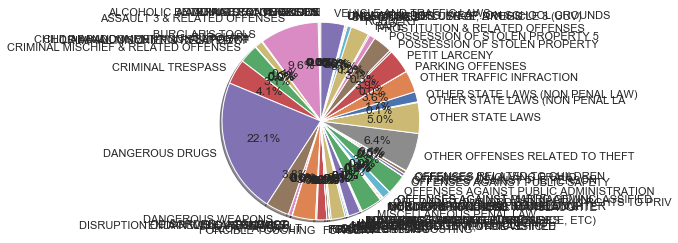

In [ ]:
ofns_desc_group = arrest_data.groupby("OFNS_DESC")["OFNS_DESC"]
counts = np.array(ofns_desc_group.count())
offenses = np.array(ofns_desc_group.unique())
offenses = [offense[0] for offense in offenses]
# arrest_data.groupby("OFNS_DESC")["OFNS_DESC"]
# arrest_data.groupby("OFNS_DESC")["OFNS_DESC"].count() #["OFNS_DESC"].hist(bins=25)

# names = ['group_a', 'group_b', 'group_c']
# values = [1, 10, 100]

# Trash #1
# plt.figure()
# plt.bar(offenses, counts)
# plt.show()
# bit of a conundrum, aye?

# Trash #2
# fig, axes = plt.subplots(nrows=2, ncols=3)
# axes[0][0].barh(offenses[:3], counts[:3], align='center')
# plt.tight_layout()
# display(counts[:3])
# display(offenses[:3])

# 75 too many to visualize...
fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=offenses, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
perp_race_keys = arrest_data.groupby("PERP_RACE")["PERP_RACE"].groups.keys()
# Turns out the line below yields the same result...
# arrest_data["PERP_RACE"].values

In [ ]:
plt.figure(figsize=(20,10))
plt.hist(arrest_data["PERP_RACE"].values, histtype='bar')

plt.show()

In [ ]:
# https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html
# arrest_data.groupby(["AGE_GROUP", "PERP_RACE"]).groups
age_group_perp_race_group = arrest_data.groupby(["AGE_GROUP", "PERP_RACE"])
age_group_perp_race_keys = age_group_perp_race_group.indices.keys()
age_group_perp_race_group.groups[('18-24', 'WHITE')]
race_age_group_occurences = {key: len(age_group_perp_race_group.groups[key]) for key in age_group_perp_race_keys}
# sorted(race_age_group_occurences)
race_age_group_occurences

In [ ]:
# plt.hist(age_group_perp_race_keys, data=race_age_group_occurences, histtype='bar')
# plt.figure(figsize=(20, 10))
# plt.show()

# Would work if x contained numerical data... https://stackoverflow.com/a/37266356
# lists = sorted(race_age_group_occurences.items())
# x, y = zip(*lists)
# plt.plot(x, y)
# plt.show()

# plt.matshow(age_group_perp_race_group.corr())
# plt.show()

# plt.plot(*zip(*sorted(race_age_group_occurences.items())))
# plt.show()

# This is basically want I want... but it didn't work https://datascience.stackexchange.com/a/44557
# plt.bar(race_age_group_occurences.keys(), race_age_group_occurences.values(), width=.5, color='g')

age_group_set = set([age_group for (age_group, _) in race_age_group_occurences.keys()])

fig, axes = plt.subplots(nrows=5, ncols=1, sharex=True, sharey=True)
for i, age_group in enumerate(age_group_set):
    axes[i].set(title=age_group)
    
# axes[0, 0].set(title='Upper Left')
# axes[0, 1].set(title='Upper Right')
# axes[1, 0].set(title='Lower Left')
# axes[1, 1].set(title='Lower Right')

plt.show()
age_group_set